In [63]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#import tabpy_client
%matplotlib inline


In [64]:
heart = pd.read_csv("heart.csv")
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [65]:
heart.columns = ['age', 'sex', 'c_pain', 'blood_pressure', 'cholesterol', 'blood_sugar', 'ecg', 'max_heart_rate',
       'induced_angina', 'depression', 'slope', 'major_vessels', 'thal', 'diagnosis']

heart.columns

Index(['age', 'sex', 'c_pain', 'blood_pressure', 'cholesterol', 'blood_sugar',
       'ecg', 'max_heart_rate', 'induced_angina', 'depression', 'slope',
       'major_vessels', 'thal', 'diagnosis'],
      dtype='object')

In [66]:
heart.head()

,age,sex,c_pain,blood_pressure,cholesterol,blood_sugar,ecg,max_heart_rate,induced_angina,depression,slope,major_vessels,thal,diagnosis
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
minAge=min(heart.age)
maxAge=max(heart.age)
meanAge=heart.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [68]:
heart.age.value_counts()[:10]
#data age show value counts for age least 10

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

In [69]:
print ("Count each sex per heart disease type")
heart.groupby(["diagnosis", "sex"])["age"].count()

Count each sex per heart disease type


diagnosis  sex
0          0       24
           1      114
1          0       72
           1       93
Name: age, dtype: int64

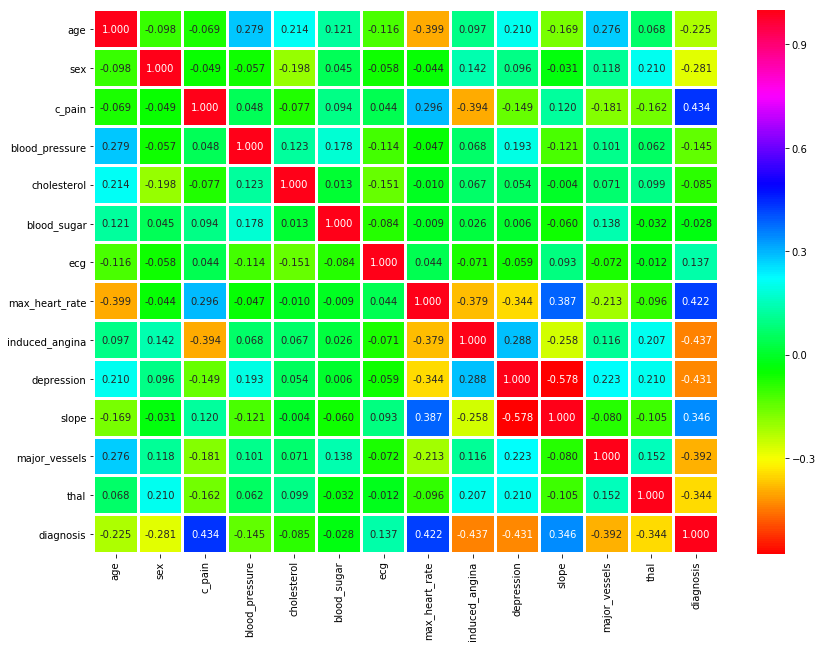

In [70]:
plt.figure(figsize=(14,10))
sns.heatmap(heart.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [71]:
heart.groupby('c_pain',as_index=False)['diagnosis'].mean()

,c_pain,diagnosis
0,0,0.272727
1,1,0.820000
2,2,0.793103
3,3,0.695652


In [72]:
heart.groupby('slope',as_index=False)['diagnosis'].mean()

,slope,diagnosis
0,0,0.428571
1,1,0.350000
2,2,0.753521


In [73]:
# checking columns for missing values, none found
heart.isnull().sum()

age               0
sex               0
c_pain            0
blood_pressure    0
cholesterol       0
blood_sugar       0
ecg               0
max_heart_rate    0
induced_angina    0
depression        0
slope             0
major_vessels     0
thal              0
diagnosis         0
dtype: int64

In [74]:
# Getting the target variable
X, y = heart.iloc[:, :-1], heart.iloc[:, -1]
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [75]:
#splitting the data for analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


In [76]:
#X_scaler = StandardScaler().fit(X_train)
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [77]:
# scale feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
# creating a keyword dictionary/ keyword argument
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
   
    # initiating model
    model = classifier(**kwargs)
    
    # training model
    model.fit(X_train,y_train)
    
    # checking accuracy and printing results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    ypred_from_tree = model.predict(X_test)
    
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
   
    
    return model

In [79]:
#model_tree = DecisionTreeClassifier()
#model_tree.fit(X_train, y_train)
#ypred_from_tree = model_tree.predict(X_test)
#print(classification_report(y_test, ypred_from_tree))
#print('\n')
#print(confusion_matrix( y_test, ypred_from_tree))

Train accuracy: 99.53%
Test accuracy: 75.82%


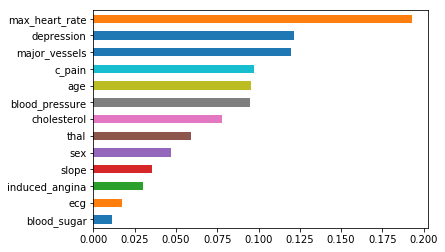

In [80]:
# Random Forest classifier
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=42)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

In [81]:
#model_tree = RandomForestClassifier()
#model_tree.fit(X_train, y_train)
#ypred_from_tree = model_tree.predict(X_test)
#print(classification_report(y_test, ypred_from_tree))
#print('\n')
#print(confusion_matrix( y_test, ypred_from_tree))

In [82]:
# tuned Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=110, random_state=42)

Train accuracy: 100.00%
Test accuracy: 90.11%


In [83]:
# KNN
model = train_model(X_train, y_train.ravel(), X_test, y_test, KNeighborsClassifier)

Train accuracy: 84.43%
Test accuracy: 83.52%


In [84]:
# Seek optimal 'n_neighbours' parameter
#for i in range(1,10):
   # print("n_neigbors = "+str(i))
   # train_model(X_train, y_train.ravel(), X_test, y_test, KNeighborsClassifier, n_neighbors= i)

Train accuracy: 100.00%
Test accuracy: 69.23%


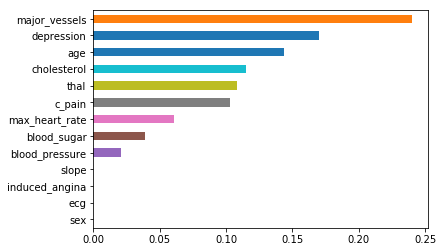

In [85]:
# Decision Tree
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=42)

# plot feature importances
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()


In [86]:
# Check optimal 'max_depth' parameter
for i in range(1,8):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=42)

max_depth = 1
Train accuracy: 74.06%
Test accuracy: 72.53%
max_depth = 2
Train accuracy: 77.83%
Test accuracy: 84.62%
max_depth = 3
Train accuracy: 84.43%
Test accuracy: 82.42%
max_depth = 4
Train accuracy: 87.74%
Test accuracy: 74.73%
max_depth = 5
Train accuracy: 90.57%
Test accuracy: 67.03%
max_depth = 6
Train accuracy: 93.40%
Test accuracy: 69.23%
max_depth = 7
Train accuracy: 97.17%
Test accuracy: 72.53%


In [87]:
# Logistic Regression
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 84.43%
Test accuracy: 91.21%


In [88]:
y_score = model.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.93


In [89]:
# Vector Machines
model = train_model(X_train, y_train, X_test, y_test, SVC)


Train accuracy: 91.04%
Test accuracy: 86.81%


In [90]:
# tuned SVM
model = train_model(X_train, y_train, X_test, y_test, SVC, C=0.05, kernel='linear')

Train accuracy: 83.02%
Test accuracy: 90.11%


In [91]:
y_score = model.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.92


In [92]:
#Gaussian Naive Bayes
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)


Train accuracy: 78.77%
Test accuracy: 91.21%


In [93]:
# Creat an empty list
accuracy = []
#precision = []

# Classifiers
classifiers = ['Naive Bayes','Logistic Regression','Random Forests',  'SVM','KNN', 'Decision Trees']

# list of classifiers with parameters
models = [RandomForestClassifier(n_estimators=110, random_state=42),KNeighborsClassifier(n_neighbors=5), LogisticRegression(), 
        GaussianNB(), SVC(C=0.05, kernel='linear'),DecisionTreeClassifier(max_depth=6, random_state=42) ]
4

# append to list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)
    #precision.append(average_precision)

In [94]:
# Accuracy dataframe
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)     
sort_by_accuracy = summary.sort_values('accuracy',ascending=False)
sort_by_accuracy

,accuracy
Random Forests,0.912088
SVM,0.912088
Naive Bayes,0.901099
KNN,0.901099
Logistic Regression,0.835165
Decision Trees,0.692308


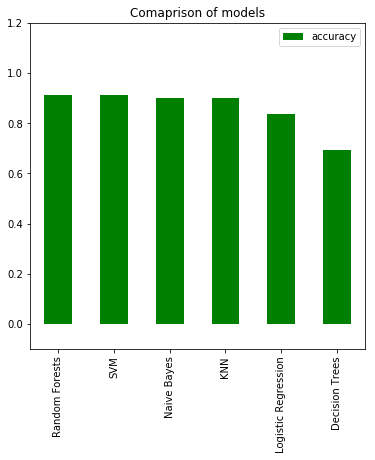

In [95]:
fig =sort_by_accuracy.plot(kind='bar',title='Comaprison of models',color='g',figsize =(6,6),ylim=[-0.1,1.2]).get_figure()
fig.savefig('image.png')

In [96]:
# linear regression
X = heart["c_pain"].values.reshape(-1, 1)
y = heart["cholesterol"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (303, 1) (303, 1)


Text(0, 0.5, 'Cholesterol')

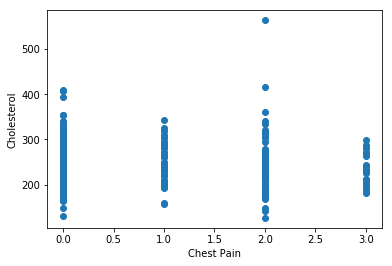

In [97]:
plt.scatter(X, y)
plt.xlabel("Chest Pain")
plt.ylabel("Cholesterol")


In [98]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [99]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
score = linear_reg.score(X_test, y_test)
score


0.5535596541063654

In [101]:

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")



Mean Squared Error (MSE): 0.11051838051949653
R-squared (R2 ): 0.5535596541063654


In [102]:
model.score(X_test, y_test)

0.5535596541063654

In [103]:
heart.drop('diagnosis', axis=1, inplace=True)

In [104]:
heart.head()

,age,sex,c_pain,blood_pressure,cholesterol,blood_sugar,ecg,max_heart_rate,induced_angina,depression,slope,major_vessels,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [105]:
from sklearn.datasets import make_regression

n_features = 13
X, y = make_regression(n_samples=303, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

(303, 13)


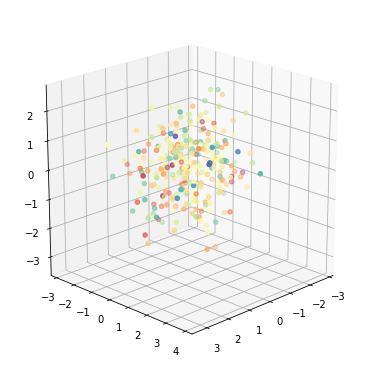

In [106]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

In [107]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.9999953287854669


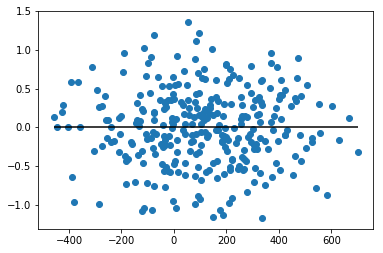

In [108]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()